In [71]:
#iMportinglibraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import string
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, SpatialDropout1D
from tensorflow.keras.callbacks import EarlyStopping
import joblib

In [41]:
#dataCollection
#Readcsvfile
train_data=pd.read_csv('train_data.csv' , sep=':::',encoding  = "latin-1", engine='python',names=['Title','Genre','Description'])
train_data.head()

,Title,Genre,Description
"ï»¿""1",Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
"""3","Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
"""4",The Secret Sin (1915),drama,To help their unemployed father make ends mee...
"""5",The Unrecovered (2007),drama,The film's title refers not only to the un-re...


In [42]:
#data info
test_data=pd.read_csv( 'test_data.csv' , sep=':::',encoding = "latin-1", engine='python',names=['ID', 'Title','Description'])
test_data.head()

,ID,Title,Description
0,"ï»¿""1",Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar..."
1,"""2",La guerra de papÃÂ¡ (1977),"Spain, March 1964: Quico is a very naughty ch..."
2,"""3",Off the Beaten Track (2010),One year in the life of Albin and his family ...
3,"""4",Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi..."
4,"""5",Er nu zhai (1955),Before he was known internationally as a mart...


/usr/local/lib/python3.10/dist-packages/google/colab/_quickchart_lib.py:26: UserWarning: Glyph 131 (\x83) missing from current font.
  plt.savefig(
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:80: UserWarning: Glyph 131 (\x83) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/google/colab/_quickchart_lib.py:26: UserWarning: Glyph 131 (\x83) missing from current font.
  plt.savefig(
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:80: UserWarning: Glyph 131 (\x83) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/google/colab/_quickchart_lib.py:26: UserWarning: Glyph 131 (\x83) missing from current font.
  plt.savefig(


import numpy as np
from google.colab import autoviz

def categorical_histogram(df, colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  df.groupby(colname).size().plot(kind='barh', color=sns.palettes.mpl_palette(mpl_palette_name), figsize=(8*figscale, 4.8*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(_df_0, *['ID'], **{})
chart

import numpy as np
from google.colab import autoviz

def categorical_histogram(df, colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  df.groupby(colname).size().plot(kind='barh', color=sns.palettes.mpl_palette(mpl_palette_name), figsize=(8*figscale, 4.8*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(_df_1, *['Title'], **{})
chart

import numpy as np
from google.colab import autoviz

def categorical_histogram(df, colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  df.groupby(colname).size().plot(kind='barh', color=sns.palettes.mpl_palette(mpl_palette_name), figsize=(8*figscale, 4.8*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(_df_2, *['Description'], **{})
chart

import numpy as np
from google.colab import autoviz

def heatmap(df, x_colname, y_colname, figscale=1, mpl_palette_name='viridis'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  import pandas as pd
  plt.subplots(figsize=(8 * figscale, 8 * figscale))
  df_2dhist = pd.DataFrame({
      x_label: grp[y_colname].value_counts()
      for x_label, grp in df.groupby(x_colname)
  })
  sns.heatmap(df_2dhist, cmap=mpl_palette_name)
  plt.xlabel(x_colname)
  plt.ylabel(y_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = heatmap(_df_3, *['ID', 'Title'], **{})
chart

import numpy as np
from google.colab import autoviz

def heatmap(df, x_colname, y_colname, figscale=1, mpl_palette_name='viridis'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  import pandas as pd
  plt.subplots(figsize=(8 * figscale, 8 * figscale))
  df_2dhist = pd.DataFrame({
      x_label: grp[y_colname].value_counts()
      for x_label, grp in df.groupby(x_colname)
  })
  sns.heatmap(df_2dhist, cmap=mpl_palette_name)
  plt.xlabel(x_colname)
  plt.ylabel(y_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = heatmap(_df_4, *['Title', 'Description'], **{})
chart

/usr/local/lib/python3.10/dist-packages/google/colab/_quickchart_lib.py:26: UserWarning: Glyph 131 (\x83) missing from current font.
  plt.savefig(
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:80: UserWarning: Glyph 131 (\x83) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/google/colab/_quickchart_lib.py:26: UserWarning: Glyph 131 (\x83) missing from current font.
  plt.savefig(
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:80: UserWarning: Glyph 131 (\x83) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/google/colab/_quickchart_lib.py:26: UserWarning: Glyph 131 (\x83) missing from current font.
  plt.savefig(
/usr/local/lib/python3.10/dist-packages/google/colab/_quickchart_lib.py:26: UserWarning: Glyph 131 (\x83) missing from current font.
  plt.savefig(
/usr/local/lib/python3.10/dist-packages/google/colab/_quickchart_lib.py:26: UserWarning: Glyph 131 (\x83) missing from current font.

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_5, *['index'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_6, *['index'], **{})
chart

import numpy as np
from google.colab import autoviz

def categorical_histogram(df, colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  df.groupby(colname).size().plot(kind='barh', color=sns.palettes.mpl_palette(mpl_palette_name), figsize=(8*figscale, 4.8*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(_df_7, *['ID'], **{})
chart

import numpy as np
from google.colab import autoviz

def categorical_histogram(df, colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  df.groupby(colname).size().plot(kind='barh', color=sns.palettes.mpl_palette(mpl_palette_name), figsize=(8*figscale, 4.8*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(_df_8, *['Title'], **{})
chart

import numpy as np
from google.colab import autoviz

def categorical_histogram(df, colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  df.groupby(colname).size().plot(kind='barh', color=sns.palettes.mpl_palette(mpl_palette_name), figsize=(8*figscale, 4.8*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(_df_9, *['Description'], **{})
chart

import numpy as np
from google.colab import autoviz

def heatmap(df, x_colname, y_colname, figscale=1, mpl_palette_name='viridis'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  import pandas as pd
  plt.subplots(figsize=(8 * figscale, 8 * figscale))
  df_2dhist = pd.DataFrame({
      x_label: grp[y_colname].value_counts()
      for x_label, grp in df.groupby(x_colname)
  })
  sns.heatmap(df_2dhist, cmap=mpl_palette_name)
  plt.xlabel(x_colname)
  plt.ylabel(y_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = heatmap(_df_10, *['ID', 'Title'], **{})
chart

import numpy as np
from google.colab import autoviz

def heatmap(df, x_colname, y_colname, figscale=1, mpl_palette_name='viridis'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  import pandas as pd
  plt.subplots(figsize=(8 * figscale, 8 * figscale))
  df_2dhist = pd.DataFrame({
      x_label: grp[y_colname].value_counts()
      for x_label, grp in df.groupby(x_colname)
  })
  sns.heatmap(df_2dhist, cmap=mpl_palette_name)
  plt.xlabel(x_colname)
  plt.ylabel(y_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = heatmap(_df_11, *['Title', 'Description'], **{})
chart

import numpy as np
from google.colab import autoviz

def violin_plot(df, value_colname, facet_colname, figscale=1, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (12 * figscale, 1.2 * figscale * len(df[facet_colname].unique()))
  plt.figure(figsize=figsize)
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(_df_12, *['index', 'ID'], **{'inner': 'stick'})
chart

import numpy as np
from google.colab import autoviz

def violin_plot(df, value_colname, facet_colname, figscale=1, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (12 * figscale, 1.2 * figscale * len(df[facet_colname].unique()))
  plt.figure(figsize=figsize)
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(_df_13, *['index', 'Title'], **{'inner': 'stick'})
chart

import numpy as np
from google.colab import autoviz

def violin_plot(df, value_colname, facet_colname, figscale=1, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (12 * figscale, 1.2 * figscale * len(df[facet_colname].unique()))
  plt.figure(figsize=figsize)
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(_df_14, *['index', 'Description'], **{'inner': 'stick'})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_15, *['index', 'count()', 'ID'], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_16, *['index', 'count()', 'Title'], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_17, *['index', 'count()', 'Description'], **{})
chart

In [43]:
train_data.describe()

,Title,Genre,Description
count,54214,54214,54214
unique,54214,27,54108
top,Oscar et la dame rose (2009),drama,Grammy - music award of the American academy ...
freq,1,13613,12


In [44]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 54214 entries, ï»¿"1  to "54214 
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Title        54214 non-null  object
 1   Genre        54214 non-null  object
 2   Description  54214 non-null  object
dtypes: object(3)
memory usage: 1.7+ MB


In [45]:
train_data.isnull().sum()

Title          0
Genre          0
Description    0
dtype: int64

Text(0.5, 1.0, 'Distribution of Genres')

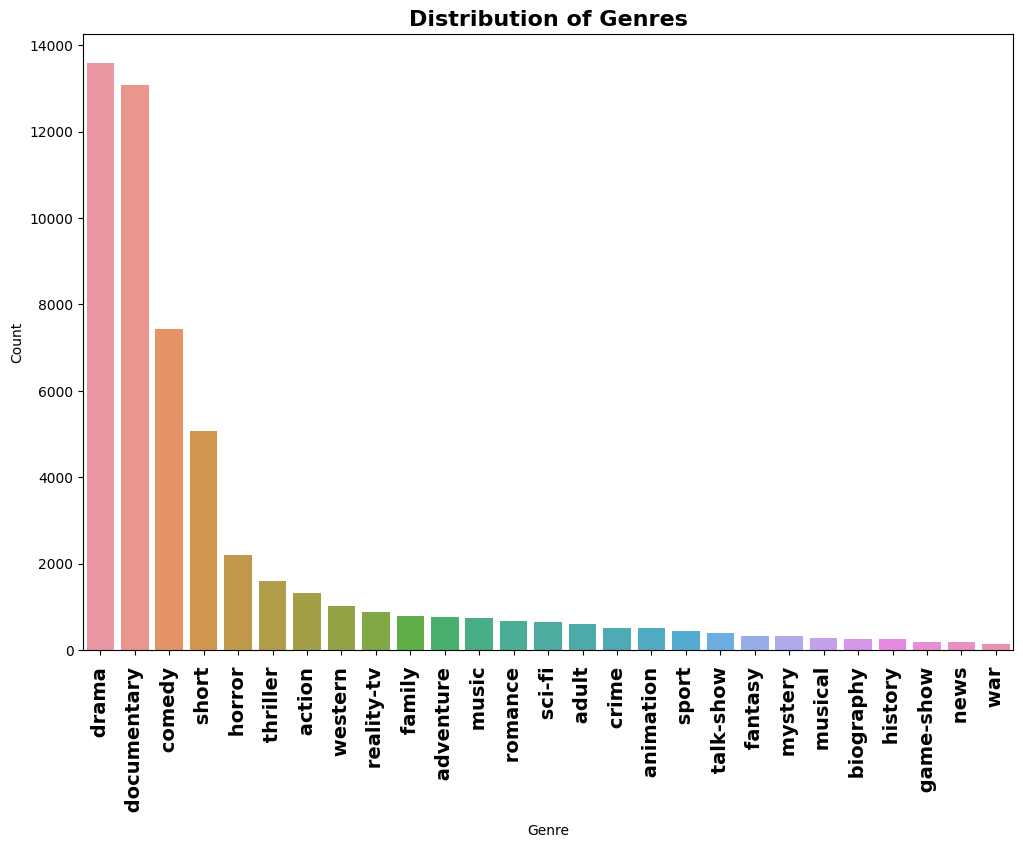

In [80]:
#Data visualization
#eXpLoRation

plt.figure(figsize=(12,8))
counts = train_data.Genre.value_counts()
sns.barplot(x=counts.index, y=counts, orient='v')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=90, fontsize=14, fontweight='bold')
plt.title('Distribution of Genres', fontsize=16, fontweight='bold')

In [47]:
train_data['length']=train_data['Description'].apply(len)
train_data.head()

,Title,Genre,Description,length
"ï»¿""1",Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...,617
2,Cupid (1997),thriller,A brother and sister with a past incestuous r...,254
"""3","Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...,722
"""4",The Secret Sin (1915),drama,To help their unemployed father make ends mee...,1124
"""5",The Unrecovered (2007),drama,The film's title refers not only to the un-re...,695


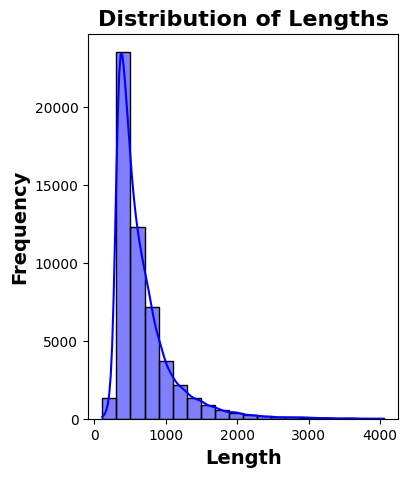

In [77]:
#DaTA PreProceSsIng
plt.figure(figsize=(4, 5))
sns.histplot(data=train_data, x='length', bins=20, kde=True, color='blue')
plt.xlabel('Length', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')
plt.title('Distribution of Lengths', fontsize=16, fontweight='bold')
plt.show()

In [78]:
#SteMminG AlGORithm FrOm nltk LIbRaRy
#ImprovinG MOdel PerfOrmaNce

def clean_text(text):
    text = text.lower()
    text = re.sub('-',' ',text.lower())
    text = re.sub(f'[{string.digits}]',' ',text)
    text = ' '.join([stemmer.stem(word) for word in text.split() if word not in stop_words])
    text =  re.sub(r'@\S+', '',text)
    text =  re.sub(r'http\S+', '',text)
    text =  re.sub(r'pic.\S+', '',text)
    text =  re.sub(r"[^a-zA-Z+']", ' ',text)
    text = re.sub(r'\s+[a-zA-Z]\s+', ' ', text+' ')
    text = "".join([i for i in text if i not in string.punctuation])
    words = nltk.tokenize.word_tokenize(text,language="english", preserve_line=True)
    stopwords = nltk.corpus.stopwords.words('english')
    text = " ".join([i for i in words if i not in stopwords and len(i)>2])
    text = re.sub("\s[\s]+", " ",text).strip()
    return re.sub(f'[{re.escape(string.punctuation)}]','',text)


In [50]:
input_text = "Certainly you get a dramatic boost from hello bye the the hi -iv iem-k q934*2yee !*3 2e38"
print(f'Original text: {input_text}')
print(f'Cleaned text: {clean_text(input_text)}')

Original text: Certainly you get a dramatic boost from hello bye the the hi -iv iem-k q934*2yee !*3 2e38
Cleaned text: certain get dram boost hello bye iem


In [51]:
#applying certain test cleaning functions
train_data['Text_cleaning'] = train_data.Description.apply(clean_text)
test_data['Text_cleaning'] = test_data.Description.apply(clean_text)



In [52]:
train_data.head()

,Title,Genre,Description,length,Text_cleaning
"ï»¿""1",Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...,617,list convers doct parents year old osc learn n...
2,Cupid (1997),thriller,A brother and sister with a past incestuous r...,254,broth sist past incestu rel cur murd relations...
"""3","Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...,722,bus empty stud field trip muse nat history lit...
"""4",The Secret Sin (1915),drama,To help their unemployed father make ends mee...,1124,help unemploy fath mak end meet edi twin sist ...
"""5",The Unrecovered (2007),drama,The film's title refers not only to the un-re...,695,films titl ref recov body ground zero also sta...


In [53]:
train_data['length_Text_cleaning']=train_data['Text_cleaning'].apply(len)
train_data.head()

,Title,Genre,Description,length,Text_cleaning,length_Text_cleaning
"ï»¿""1",Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...,617,list convers doct parents year old osc learn n...,324
2,Cupid (1997),thriller,A brother and sister with a past incestuous r...,254,broth sist past incestu rel cur murd relations...,83
"""3","Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...,722,bus empty stud field trip muse nat history lit...,324
"""4",The Secret Sin (1915),drama,To help their unemployed father make ends mee...,1124,help unemploy fath mak end meet edi twin sist ...,600
"""5",The Unrecovered (2007),drama,The film's title refers not only to the un-re...,695,films titl ref recov body ground zero also sta...,284


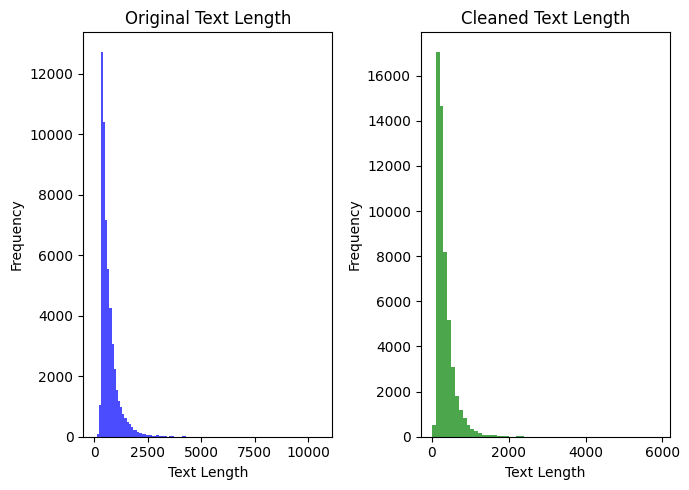

In [54]:
#Featureextraction
#DaTa preparation
plt.figure(figsize=(7, 5))


plt.subplot(1, 2, 1)
original_lengths = train_data['Description'].apply(len)
plt.hist(original_lengths, bins=range(0, max(original_lengths) + 100, 100), color='blue', alpha=0.7)
plt.title('Original Text Length')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.subplot(1, 2, 2)
cleaned_lengths = train_data['Text_cleaning'].apply(len)
plt.hist(cleaned_lengths, bins=range(0, max(cleaned_lengths) + 100, 100), color='green', alpha=0.7)
plt.title('Cleaned Text Length')
plt.xlabel('Text Length')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [55]:
(train_data['length_Text_cleaning']>2000).value_counts()

False    54133
True        81
Name: length_Text_cleaning, dtype: int64

In [56]:
print('Dataframe size (before removal): ',len(train_data))
filt=train_data['length_Text_cleaning']>2000
train_data.drop(train_data[filt].index,axis=0,inplace=True)
print('Dataframe size (after removal): ',len(train_data))
print(f'Removed rows: {filt.sum()}')


Dataframe size (before removal):  54214
Dataframe size (after removal):  54133
Removed rows: 81


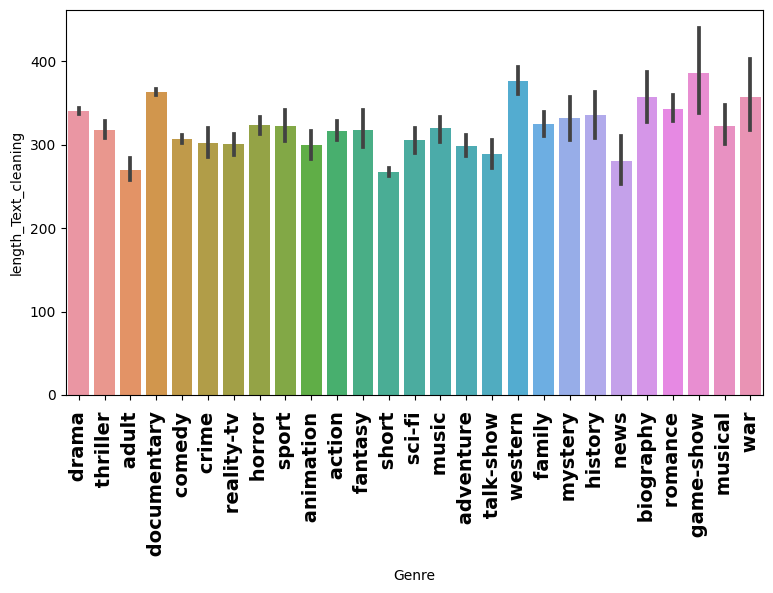

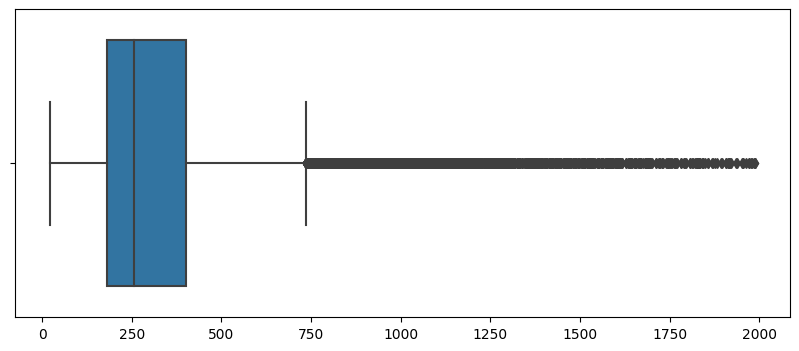

In [57]:
#data Visualization #genre
plt.figure(figsize=(9,5))
sns.barplot(x='Genre',y='length_Text_cleaning',data=train_data)
plt.xticks(rotation=90, fontsize=14, fontweight='bold')
plt.show()
plt.figure(figsize=(10,4))
sns.boxplot(x=train_data['length_Text_cleaning'].values,hue='Genre',data=train_data)
plt.show()


In [79]:
#preprocessing
tokenizer = Tokenizer(num_words=num_words, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer.fit_on_texts(train_data['Text_cleaning'].values)

In [59]:

test_data_solution=pd.read_csv( 'test_data_solution.csv' , sep=':::',encoding = "latin-1",engine='python',names=['ID','Title','Genre','Description'])
test_data_solution #test data solution.csv file

,ID,Title,Genre,Description
0,"ï»¿""1",Edgar's Lunch (1998),thriller,"L.R. Brane loves his life - his car, his apar..."
1,"""2",La guerra de papÃÂ¡ (1977),comedy,"Spain, March 1964: Quico is a very naughty ch..."
2,"""3",Off the Beaten Track (2010),documentary,One year in the life of Albin and his family ...
3,"""4",Meu Amigo Hindu (2015),drama,"His father has died, he hasn't spoken with hi..."
4,"""5",Er nu zhai (1955),drama,Before he was known internationally as a mart...
...,...,...,...,...
54195,"""54196","""""Tales of Light & Dark"""" (2013)",horror,"Covering multiple genres, Tales of Light & Da..."
54196,"""54197",Der letzte Mohikaner (1965),western,As Alice and Cora Munro attempt to find their...
54197,"""54198",Oliver Twink (2007),adult,A movie 169 years in the making. Oliver Twist...
54198,"""54199",Slipstream (1973),drama,"Popular, but mysterious rock D.J Mike Mallard..."


In [60]:
#model training
X = tokenizer.texts_to_sequences(train_data['Text_cleaning'].values)
X = pad_sequences(X, maxlen=max_len)
y = pd.get_dummies(train_data['Genre']).values

X_test = tokenizer.texts_to_sequences(test_data['Text_cleaning'].values)
X_test = pad_sequences(X_test, maxlen=max_len)
y_test = pd.get_dummies(test_data_solution['Genre']).values

In [61]:
for x in test_data_solution['Genre'].values:
    if(x==8):
        print(x)

In [62]:
EMBEDDING_DIM = 100
model = Sequential()
model.add(Embedding(num_words, EMBEDDING_DIM, input_length=X.shape[1]))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100, dropout=0.1, recurrent_dropout=0.2))
model.add(Dense(27, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [63]:
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)
print("shape of X_test",X_test.shape)
print("shape of y_test",y_test.shape)

Shape of X: (54133, 250)
Shape of y: (54133, 27)
shape of X_test (54200, 250)
shape of y_test (54200, 27)


In [64]:
#MODElevalution
#monitoringandmaintainance
my_callbacks  = [EarlyStopping(monitor='val_loss',
                               min_delta=0,
                               patience=2,
                               mode='auto')]
history = model.fit(X, y, epochs=6, batch_size=32,validation_data=(X_test,y_test), callbacks=my_callbacks)

Epoch 1/6
1692/1692 [==============================] - 1974s 1s/step - loss: 2.0076 - accuracy: 0.4178 - val_loss: 1.7255 - val_accuracy: 0.5005
Epoch 2/6
1692/1692 [==============================] - 1936s 1s/step - loss: 1.4974 - accuracy: 0.5671 - val_loss: 1.6034 - val_accuracy: 0.5338
Epoch 3/6
1692/1692 [==============================] - 1912s 1s/step - loss: 1.1598 - accuracy: 0.6633 - val_loss: 1.6079 - val_accuracy: 0.5411
Epoch 4/6
1692/1692 [==============================] - 1896s 1s/step - loss: 0.8581 - accuracy: 0.7499 - val_loss: 1.7532 - val_accuracy: 0.5318


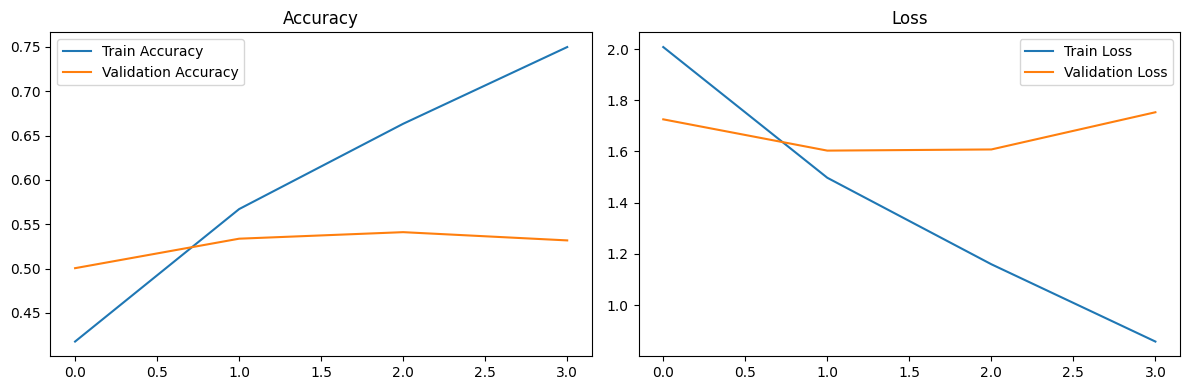

In [65]:
#visualization
#DataAnalysis
#data exploration

import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss')

plt.tight_layout()
plt.show()


In [67]:
joblib.dump(model,'GenreClass.pkl')

['GenreClass.pkl']

In [68]:
nwmod = joblib.load('GenreClass.pkl')

In [69]:
#model prediction
agg = nwmod.predict(X_test)

1694/1694 [==============================] - 117s 69ms/step


In [74]:
#model trained
print(np.argmax(agg[67]))
print(np.argmax(agg[10089]))

7
7


In [ ]:
 by shreya ghosal!!